# EDA Analysis - Speed Dating

*jedha Oct. 2023*  
Mélanie Beraud _ melanie.beraud@gmail.com

## Imports
Libraries and files

In [352]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

print('Done...')

Done...


In [353]:
dataset = pd.read_csv('Speed+Dating+Data.csv', encoding='Latin-1')
df = dataset

type(df)

pandas.core.frame.DataFrame

# Pretreatment

In [543]:
#TO RUN (explanation below)

# missing id + integer ----------------------------------
df.loc[8377, 'id'] = 22.0

df['id'] = df['id'].apply(lambda x: int(x))
print('column id has been cleaned: dtypes:', type(df.id[3200]))

#missing pid + as integer -------------------------------
df = df.drop(labels = ma_liste, axis=0)

df['pid'] = df['pid'].apply(lambda x: int(x))
print('column id has been cleaned: dtypes:', type(df['pid'][0])
      
#missing career_c + as integer --------------------------
ma_liste_iid = [1, 2, 3, 28, 40, 58, 59, 114, 136, 339, 340, 346]
ma_liste_code =[1.0, 1.0, 7.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]

for i in range(0, len(ma_liste_iid), 1):
    df.loc[df['iid'] == ma_liste_iid[i],'career_c'] = ma_liste_code[i]

df.loc[df['iid'] == 2, 'career_c'], df.loc[df['iid'] == 346, 'career_c']

df['career_c'] = df['career_c'].apply(lambda x: int(x))
print('column career_c has been cleaned: dtypes:', type(df['career_c'][0]))     
      
#missing field_cd + as integer -----------------------
ma_liste_iid = [40, 58, 59, 136, 339, 340, 346]

for i in range(0, len(ma_liste_iid),1):
    df.loc[df['iid'] == ma_liste_iid[i],'field_cd'] = 18.0

df['field_cd'] = df['field_cd'].apply(lambda x: int(x))
print('column field_cd has been cleaned: dtypes:', type(df['field_cd'][0]))  
      
#penser à réindexer le dataset !


(8368, 195)
<class 'pandas.core.series.Series'>


# **penser à réindexer le dataset !**

## Sous-sets:
Basic description, missing values not dealt with here

In [370]:
# with unique iid, count : df_iid_c
df_iid_c = df.groupby(by='iid').count() # group_keys=True ?
df_iid_c.describe(include='all')
#display(df_iid_c)

# with unique iid, sum : df_iid_s
df_iid_s = df.groupby(by='iid').sum()
#df_iid_s['match']
#display(df_iid_s)



# quand je fais tourner sur la longeur totale = ça bloque à 118, car iid = 118 is missing.
#print(df.loc[df.iid == 116,:]) ok
df.loc[df.iid == 118,:] #none
#iid 118 is missing

## Basic descriptions of df dataset

## Tests to do

In [ ]:
'''
df_colonnes_nom
df_colonnes_dtypes
df_colonnes_NaN
'''
# que pour les graphs.
basic_descr= plt.pyplot.figure(figsize = (30, 10))
plt.pyplot.subplot(311) == df_colonnes_nom

basic_descr

##########DOESN'T WORK


shape and look head/tail

In [ ]:
print('Shape:\n', df.shape)#(8378, 195)
df.head()
df.tail()

Nom des colonnes, data types et valeurs manquantes:


In [753]:
# dtypes, isany, column names in a dataframe

#len(df.columns[0:10])

## Create a liste of name of columns, granularity = 10:
liste_colonne = []
#i = 0
for i in range(0, len(df.columns)+1, 10):
       nom_colonne = f'{i}-{i+10}'
       liste_colonne.append(nom_colonne)
       #print(nom_colonne)
#liste_colonne

#Column names:
i = 0
df_colonnes_nom = pd.DataFrame(df.columns[0:10], columns=[liste_colonne[0]])

## Add the other columns with a loop
for i in range(10, len(df.columns), 10):
    #print (i)
    nom_colonne = f'{i}-{i+10}'
    #print(nom_colonne)
    df_temp = pd.DataFrame(df.columns[i:i+10], columns=[nom_colonne])
    #print(df_temp)
    df_colonnes_nom = pd.concat([df_colonnes_nom, df_temp], axis=1)
'''
ok...
[Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order'],
      dtype='object')]
[Index(['id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner'],
'''
#df_colonnes_nom

# --------------------------------------------------------------------------------------------------------------------------

#dtypes.colonnes:

df_colonnes_dtypes = pd.DataFrame(df.dtypes.iloc[0:10], columns=[liste_colonne[0]])


## Add the other columns with a loop
for i in range(10, len(df.dtypes)-9, 10):
    nom_colonne = f'{i}-{i+10}'
    df_colonnes_dtypes[nom_colonne] = df.dtypes.iloc[i:i+10].values

    #pb d'index si on ne réindex pas tout de suite la DataFrame que je n'arrive pas à gérer même avec .reindex(df_colonnes_dtypes.index) avant ou après la transfo
    #df_colonnes_dtypes = pd.concat([df_colonnes_dtypes, df_temp], axis=1)

## Add the last colonnes, because doesn't work with NaN:
ma_liste = [df.dtypes.iloc[i]for i in range (190,195,1)] 
for i in range (0,5,1):
    ma_liste.append('Nan') 
#print(len(ma_liste))
# ma_liste
df_colonnes_dtypes['190-200'] = ma_liste

df_colonnes_dtypes.index = [0,1,2,3,4,5,6,7,8,9]

#df_colonnes_dtypes

# ------------------------------
# lste of columns displaying objects as data types:
liste_objet = []

for col in df_colonnes_dtypes.columns:
    #print(col)
    for ligne in range(0,10, 1):
        #print(df_colonnes_dtypes.loc[ligne, col])
        if df_colonnes_dtypes.loc[ligne, col] == 'object':
                liste_objet.append(df_colonnes_nom.loc[ligne, col])

# -----------------------------------------------------------------------------------

#NaN.colonnes:
#i = 0 # enlevé
df_colonnes_NaN = pd.DataFrame(df.isna().any().iloc[0:10], columns=[liste_colonne[0]])


## Add the other columns with a loop
for i in range(10, len(df.isna().any())-9, 10):
    nom_colonne = f'{i}-{i+10}'
    df_colonnes_NaN[nom_colonne] = df.isna().any().iloc[i:i+10].values

    #pb d'index si on ne réindex pas tout de suite la DataFrame que je n'arrive pas à gérer même avec .reindex(df_colonnes_NaN.index) avant ou après la transfo
    #df_colonnes_NaN = pd.concat([df_colonnes_NaN, df_temp], axis=1)

## Add the last colonnes, because doesn't work with NaN:
ma_liste = [df.isna().any().iloc[i]for i in range (190,195,1)] 
for i in range (0,5,1):
    ma_liste.append('Nan') 
#print(len(ma_liste))
# ma_liste
df_colonnes_NaN['190-200'] = ma_liste
df_colonnes_NaN.index = [0,1,2,3,4,5,6,7,8,9]

#df_colonnes_NaN
# ----------------------------
# lste of columns having missing values:

liste_missing = []

for col in df_colonnes_NaN.columns:
    for ligne in range(0,10, 1):
        if df_colonnes_NaN.loc[ligne, col] == True:
                liste_missing.append(df_colonnes_nom.loc[ligne, col])


#---------------------------------------------------------

print('Columns names:\n')
display(df_colonnes_nom)
print('Columns dtypes:\n')
display(df_colonnes_dtypes)
print('List of object columns:\n', liste_objet)
print()
print('Columns missing values:\n')
display(df_colonnes_NaN)
print('List of columns with missing values:\n', liste_missing)

# Ce serait cool de récupérer automatiquement les noms de colonnes qui posent problème aussi.

Columns names:



,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,100-110,110-120,120-130,130-140,140-150,150-160,160-170,170-180,180-190,190-200
0,iid,partner,pf_o_fun,like_o,imprace,sports,tv,sinc1_1,shar4_1,intel3_1,intel,intel1_s,length,intel1_2,attr2_2,amb3_2,num_in_3,fun7_3,sinc2_3,attr5_3
1,id,pid,pf_o_amb,prob_o,imprelig,tvsports,theater,intel1_1,attr2_1,amb3_1,fun,fun1_s,numdat_2,fun1_2,sinc2_2,attr5_2,attr1_3,amb7_3,intel2_3,sinc5_3
2,gender,match,pf_o_sha,met_o,from,exercise,movies,fun1_1,sinc2_1,attr5_1,amb,amb1_s,attr7_2,amb1_2,intel2_2,sinc5_2,sinc1_3,shar7_3,fun2_3,intel5_3
3,idg,int_corr,dec_o,age,zipcode,dining,concerts,amb1_1,intel2_1,sinc5_1,shar,shar1_s,sinc7_2,shar1_2,fun2_2,intel5_2,intel1_3,attr4_3,amb2_3,fun5_3
4,condtn,samerace,attr_o,field,income,museums,music,shar1_1,fun2_1,intel5_1,like,attr3_s,intel7_2,attr4_2,amb2_2,fun5_2,fun1_3,sinc4_3,shar2_3,amb5_3
5,wave,age_o,sinc_o,field_cd,goal,art,shopping,attr4_1,amb2_1,fun5_1,prob,sinc3_s,fun7_2,sinc4_2,shar2_2,amb5_2,amb1_3,intel4_3,attr3_3,NaN
6,round,race_o,intel_o,undergra,date,hiking,yoga,sinc4_1,shar2_1,amb5_1,met,intel3_s,amb7_2,intel4_2,attr3_2,you_call,shar1_3,fun4_3,sinc3_3,NaN
7,position,pf_o_att,fun_o,mn_sat,go_out,gaming,exphappy,intel4_1,attr3_1,dec,match_es,fun3_s,shar7_2,fun4_2,sinc3_2,them_cal,attr7_3,amb4_3,intel3_3,NaN
8,positin1,pf_o_sin,amb_o,tuition,career,clubbing,expnum,fun4_1,sinc3_1,attr,attr1_s,amb3_s,attr1_2,amb4_2,intel3_2,date_3,sinc7_3,shar4_3,fun3_3,NaN
9,order,pf_o_int,shar_o,race,career_c,reading,attr1_1,amb4_1,fun3_1,sinc,sinc1_s,satis_2,sinc1_2,shar4_2,fun3_2,numdat_3,intel7_3,attr2_3,amb3_3,NaN


Columns dtypes:



,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,100-110,110-120,120-130,130-140,140-150,150-160,160-170,170-180,180-190,190-200
0,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,int64,int64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3,int64,float64,int64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4,int64,int64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,Nan
6,int64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,Nan
7,int64,float64,float64,object,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,Nan
8,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,Nan
9,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,Nan


List of object columns:
 ['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income', 'career']

Columns missing values:



,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100,100-110,110-120,120-130,130-140,140-150,150-160,160-170,170-180,180-190,190-200
0,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Nan
6,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Nan
7,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,Nan
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Nan
9,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Nan


List of columns with missing values:
 ['positin1', 'int_corr', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s',

In [ ]:
df.describe(include='all')

Check for objects and missing values

In [ ]:
# id/pid - DO NOT RUN
'''
# id

df.id[8377] #nan
df['id'].nunique(dropna=False)

for i in range(len(df)):
    #print(i)
    try:
        int(df['id'][i])
    except:
        print(i)
    # None.... (but isna().any() was not null)

print(df.id[8377], df.iid[8377], df.iid[8376], df.id[8376]) #same iid, so id 8377 should be te same than id 8377.

print(df.id[8377], df.id[8376])

+ makes int
type(df.id[0])#

#________________________________________________________________________________
#pid

df.pid.isna().any()

ma_liste = []

for ligne in range(0,len(df), 1):
    try:
        int(df['pid'][ligne])       
    except:
         mon_dict = {'ligne': ligne, 'pid': df['pid'][ligne], 'iid' : df['iid'][ligne], 'wave': df['wave'][ligne], 'gender': df['gender'][ligne]}
         ma_liste.append(ligne)
         print(mon_dict)



{'ligne': 1755, 'pid': nan, 'iid': 122, 'wave': 5, 'gender': 1}
{'ligne': 1765, 'pid': nan, 'iid': 123, 'wave': 5, 'gender': 1}
{'ligne': 1775, 'pid': nan, 'iid': 124, 'wave': 5, 'gender': 1}
{'ligne': 1785, 'pid': nan, 'iid': 125, 'wave': 5, 'gender': 1}
{'ligne': 1795, 'pid': nan, 'iid': 126, 'wave': 5, 'gender': 1}
{'ligne': 1805, 'pid': nan, 'iid': 127, 'wave': 5, 'gender': 1}
{'ligne': 1815, 'pid': nan, 'iid': 128, 'wave': 5, 'gender': 1}
{'ligne': 1825, 'pid': nan, 'iid': 129, 'wave': 5, 'gender': 1}
{'ligne': 1835, 'pid': nan, 'iid': 130, 'wave': 5, 'gender': 1}
{'ligne': 1845, 'pid': nan, 'iid': 131, 'wave': 5, 'gender': 1}

 In wave 5, all gender 1. someone is missing in tis wave... Could it be 118 ? Nope.it is not there...


df_wave5 = df.loc[df['wave'] == 5,['iid', 'id', 'gender', 'round', 'pid']]
df_wave5.loc[df['gender'] == 1,:] # 0 _ 190, 1 = 100

# récupérer les participants 0, regarder les 1 qui leur manque

df_wave5.loc[df['iid'] == 122, :] # 112 à 121, pas de 118 voir avc le 122 (self) et le 111
df.loc[df['pid'] == 111, 'wave'] # le 111 est wave 4
# donc c'est bien le 118 qui nous enquiquinne... Il n'existe pas vraiment. Check avec les autres...

df_wave5.groupby(by='pid', dropna=False).count() # le mieux est de virer ce truc qui ne nous sert pas.

df2 = df
df2.shape

df2 = df2.drop(labels = ma_liste, axis=0)
df2.shape

df2.pid.isna().any()

'''



In [ ]:
# number of waves / number of id - DO NOT RUN
'''
# all only 1 value per wave.
df.groupby('iid')['wave'].nunique().value_counts()
# all only 1 value for id.
df.groupby('iid')['id'].nunique().value_counts()
# 22 different values possible
df['id'].nunique() # 22
df['id'].nunique(dropna=False) # 23 +Na


# Number of wave per participants #1


# Each iid has only 1 id.
for ligne in df.groupby('iid')['id'].nunique():
    if df.groupby('iid')['id'].nunique()[ligne]!= 1:
        print(df.groupby('iid')['id'].nunique().index)
# 1 for all

df.groupby('iid')['wave'].nunique().count
for ligne in df.groupby('iid')['wave'].nunique():
    if df.groupby('iid')['wave'].nunique()[ligne]!= 1:
        print(df.groupby('iid')['wave'].nunique().index)
# 1 for all


# of participants/wave:

#df_wave_c = df.groupby(by='wave').count() # multiplie car il y a entre 5 et 10 lignes par participants, donc pas cool
#df_wave_c['iid']
#df_wave_c.head()
# we need to calculate the number of waves each participants participatedas well as te number of wave. 
# We juste have to check that partner/wave = 1

print(len(df_iid_c))
for i in range(1, 118, 1):
    #print(i)
    #print(df_iid_c.loc[i,'wave'])
    if df_iid_c.loc[i,'wave']/df_iid_c.loc[i,'partner'] != 1:
        print('not1')

for i in range(119, len(df_iid_c), 1):
    #print(i)
    #print(df_iid_c.loc[i,'wave'])
    if df_iid_c.loc[i,'wave']/df_iid_c.loc[i,'partner'] != 1:
        print('not1')

# all only in 1 wave.

for i in range(1, 118, 1):
    #print(i)
    #print(df_iid_c.loc[i,'wave'])
    df_iid_c['partner_wave'] = df_iid_c.loc[i,'wave']/df_iid_c.loc[i,'partner']


for i in range(119, len(df_iid_c), 1):
    #print(i)
    #print(df_iid_c.loc[i,'wave'])
    df_iid_c['partner_wave'] = df_iid_c.loc[i,'wave']/df_iid_c.loc[i,'partner']

#118 doesn't exist


# missing id
for i in range(len(df)):
    #print(i)
    if df['id'][i] == 'NaN':
        #print(df['iid'][i])
        print(df['iid'][i])
    # None.... (but isna().any() was not null)
''''''


In [ ]:
# career and field - DO NOT RUN

'''
df_carriere = df.loc[:,['iid', 'field', 'field_cd', 'career','career_c']].reset_index() #need to reset index, or the for loop doesn't work !!!
df_carriere.isna().any()


df_carriere_NaN = pd.DataFrame(columns=['index', 'iid', 'career', 'career_coded'])
print(type(df_carriere_NaN))

for i in range(0, len(df_carriere), 1):
    #print(i, df_carriere.index[i], df_carriere.iid[i],df_carriere.career[i], df_carriere.career_c[i] )
    try:
        int(df_carriere.loc[i,'career_c'])
    except:
        mon_dict = {'index':df_carriere.index[i], 'iid':df_carriere.iid[i], 'career':df_carriere.career[i], 'career_coded':df_carriere.career_c[i]}
        #print(mon_dict)
        df_temp = pd.DataFrame.from_dict([mon_dict])
        df_carriere_NaN = pd.concat([df_carriere_NaN, df_temp], axis = 0)
        

#mon_dict
ma_liste = [df_carriere_NaN.groupby('iid')['iid'].nunique()]
#ma_liste  #iid problematiques: 1, 2, 3, 28, 40, 58, 59, 114, 136, 339, 340, 346, len(ma_liste) =1

df_carriere_NaN

ma_liste_iid = [1, 2, 3, 28, 40, 58, 59, 114, 136, 339, 340, 346]
ma_liste_code =[1.0, 1.0, 7.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
#check for 3
#df_carriere_NaN.loc[df_carriere_NaN.iid == 346, :]
#len(ma_liste_iid), len(ma_liste_code)
#df2 = df


for i in range(0, len(ma_liste_iid), 1):
    df.loc[df['iid'] == ma_liste_iid[i],'career_c'] = ma_liste_code[i]

df.loc[df['iid'] == 2, 'career_c'], df.loc[df['iid'] == 346, 'career_c']
df['career_c'].isna().any()


df_carriere = df.loc[:,['iid', 'field', 'field_cd', 'career','career_c']].reset_index() #need to reset index, or the for loop doesn't work !!!
df_carriere.isna().any()

df_carriere_NaN = pd.DataFrame(columns=['index', 'iid', 'field', 'field_cd'])
print(type(df_carriere_NaN))

for i in range(0, len(df_carriere), 1):
    try:
        int(df_carriere.loc[i,'field_cd'])
    except:
        mon_dict = {'index':df_carriere.index[i], 'iid':df_carriere.iid[i], 'career':df_carriere.field[i], 'career_coded':df_carriere.field_cd[i]}
        df_temp = pd.DataFrame.from_dict([mon_dict])
        df_carriere_NaN = pd.concat([df_carriere_NaN, df_temp], axis = 0)
        

ma_liste = [df_carriere_NaN.groupby('iid')['iid'].nunique()]
#ma_liste  #iid problematiques: 40, 58, 59, 136, 339, 340, 346

ma_liste_iid = [40, 58, 59, 136, 339, 340, 346]
# all NaN so all 18

#df_carriere_NaN.loc[df_carriere_NaN.iid == 40, ['iid','field','field_cd']]

df = df
for i in range(0, len(ma_liste_iid),1):
    df.loc[df['iid'] == ma_liste_iid[i],'field_cd'] = 18.0

df.field_cd.isna().any()
df['field_cd'] = df['field_cd'].apply(lambda x: int(x))

'''

# I'M HERE

Check for the location 'from'

In [ ]:
# Check for the location 'from'

print(df.groupby('from')['from'].nunique().index) # mix of countries and departments, 269 locations)
df.groupby('from')['from'].nunique()
#nb_countries = sns.catplot(x=df.groupby('from')['from'].nunique().index, y=df.groupby('from')['from'].nunique(), color='orange')



df.groupby('from')['from'].nunique().index # mix of countries and departments, 269 locations


In [756]:
#Activities:
#always the same having NaN everywhere or different ones ?
df.loc[:,['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']].isna().any()


sports      True
tvsports    True
exercise    True
dining      True
museums     True
art         True
hiking      True
gaming      True
clubbing    True
reading     True
tv          True
theater     True
movies      True
concerts    True
music       True
shopping    True
yoga        True
dtype: bool

## Number of people in total, number of people encountered by each of them.
Total Male = 276  
Total Femelle = 276  
Total partcipants : 552  

21 Waves
id = inside a wave. But iid = total - 552.

Each partner encountered between, 5 and 22 people

c[add title, axes title and tags on the bar](red)

<Axes: title={'center': 'Each person encountered between 5 and 22 encounters \n (on 21 waves)'}, xlabel='# of partner encountered', ylabel='# of participants'>

,id,gender,idg,condtn,wave,round,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,,,,,,,,,,,,,,,,,,,,,
1,10,10,10,10,10,10,10,0,10,10,...,10,10,10,10,10,0,0,0,0,0
2,10,10,10,10,10,10,10,0,10,10,...,10,10,10,10,10,0,0,0,0,0
3,10,10,10,10,10,10,10,0,10,10,...,0,0,0,0,0,0,0,0,0,0
4,10,10,10,10,10,10,10,0,10,10,...,10,10,10,10,10,0,0,0,0,0
5,10,10,10,10,10,10,10,0,10,10,...,10,10,10,10,10,0,0,0,0,0


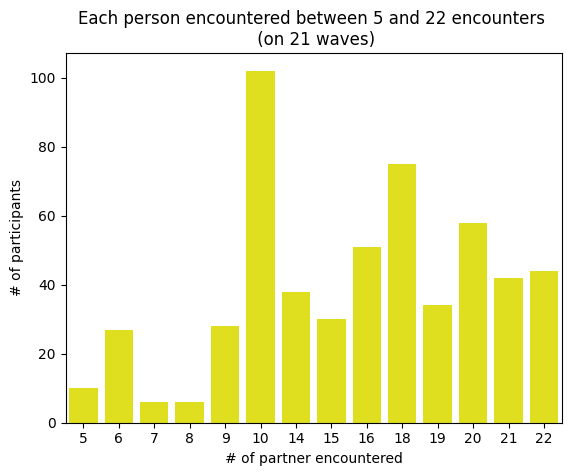

In [447]:
# Number of Waves
df.wave.nunique() #21

# Recover the number of encounters per people.
nb_partner_per_iid = pd.DataFrame(df_iid_c['partner'].value_counts().sort_index())
nb_partner_per_iid = nb_partner_per_iid.transpose()
nb_partner_per_iid

#each person got between 5 and 22 partner during the blind dates.
nb_partner_per_iid_plot = sns.barplot(nb_partner_per_iid, color='yellow')
plt.pyplot.title(f'Each person encountered between 5 and 22 encounters \n (on {df.wave.nunique()} waves)')
plt.pyplot.xlabel('# of partner encountered')
plt.pyplot.ylabel('# of participants')
display(nb_partner_per_iid_plot)




count    8378.00
mean       16.87
std         4.36
min         5.00
25%        14.00
50%        18.00
75%        20.00
max        22.00
Name: round, dtype: float64

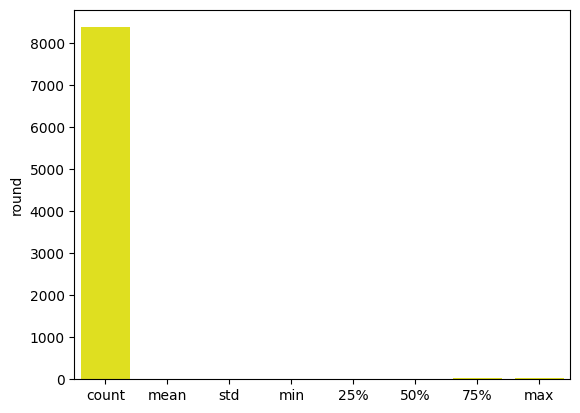

In [455]:
# to redo ?

nb_partner_per_iid_plot2 = sns.barplot(round(df['round'].describe(), 2), color='yellow')
round(df['round'].describe(), 2)


### Distribtion de la proportion de match.

c[A orienter à l'horizontal et mettre e transparence pour superposer les 2, faire une figure avec le tableau aussi](red)

In [ ]:
# Number/prop of matches per person
df_iid_s['match']

nb_match_per_iid = pd.DataFrame([df_iid_s['match'],df_iid_c['partner']]).transpose()
nb_match_per_iid.columns = ['Nb_match', 'Nb_encouters']

nb_match_per_iid['Prop_match'] = round((nb_match_per_iid.Nb_match / nb_match_per_iid.Nb_encouters)*100, 1)
nb_match_per_iid


#nb_match_per_iid_plot = sns.displot(nb_match_per_iid['Prop_match'], color='orange') #, x='Proportion of match / encounters')
#nb_match_per_iid_plot

#nb_match_per_iid_boxplot = sns.boxplot(nb_match_per_iid['Prop_match']) # A orienter à l'horizontal et mettre e transparence pour superposer les 2
#nb_match_per_iid_boxplot 
#nb_match_per_iid.describe(include='all').round(4)

sns.scatterplot(x= nb_match_per_iid['Nb_encouters'], y = nb_match_per_iid['Prop_match'])
plt.pyplot.title(f'Proportion of positive matchs does not depend \n on the number of partner encountered')

plt.pyplot.xlabel('# of partner encountered') #, labelpad=0,23)
plt.pyplot.ylabel('Proportion of positive match')

# set the xscale. Should be int.


In [ ]:
df['dec_o'] == df['match'] # Not all True
df_iid_s['dec_o']